,MSE_test,RMSE_test,MAE_test,R2_test
Regresión Lineal,0.335033,0.578820,0.444541,0.347837
Ridge Regression,0.335051,0.578836,0.444526,0.347802
Lasso Regression,0.355150,0.595945,0.455757,0.308678
Regresión Polinomial,0.304254,0.551592,0.422571,0.407751
SGD Batch,0.340824,0.583801,0.446572,0.336565
SGD Stochastic,0.441674,0.664586,0.465137,0.140253


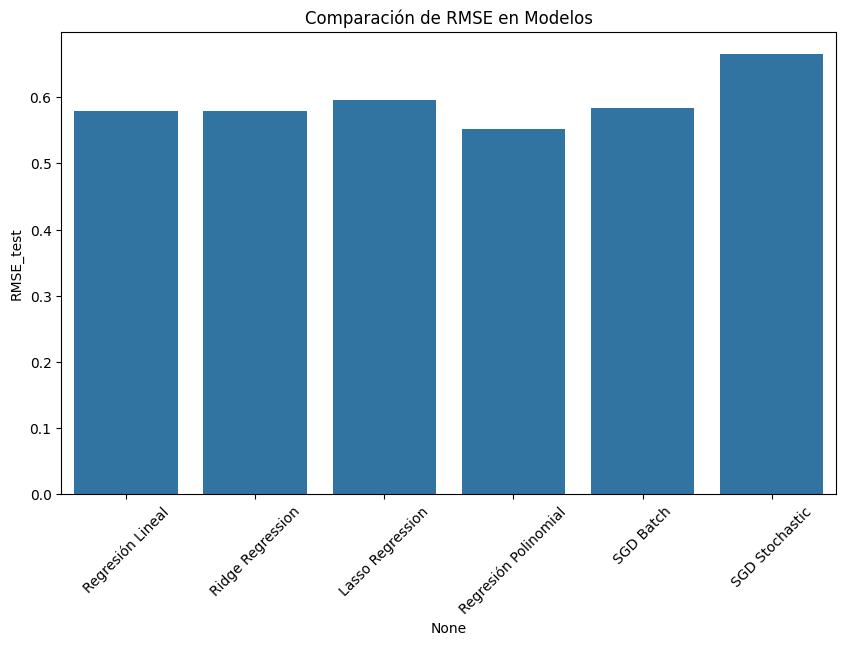

In [8]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# 2. Cargar el dataset de prueba (X_test, y_test)
DATA_PATH_X_TEST = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/data/processed/X_test.csv"
DATA_PATH_Y_TEST = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/data/processed/y_test.csv"

X_test = pd.read_csv(DATA_PATH_X_TEST)
y_test = pd.read_csv(DATA_PATH_Y_TEST).values.ravel()  # Convertir a 1D

# 3. Cargar X_train para asegurarnos de que las features coinciden
DATA_PATH_X_TRAIN = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/data/processed/X_train.csv"
X_train = pd.read_csv(DATA_PATH_X_TRAIN)

# Asegurar que las columnas sean las mismas
missing_cols = set(X_train.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train.columns)

if missing_cols:
    print(f" WARNING: X_test le faltan columnas: {missing_cols}")
if extra_cols:
    print(f" WARNING: X_test tiene columnas extra que no estaban en entrenamiento: {extra_cols}")

# Asegurar que X_test tenga las mismas columnas (rellenar con ceros si faltan)
for col in missing_cols:
    X_test[col] = 0

# Ordenar las columnas en el mismo orden
X_test = X_test[X_train.columns]

# 4. Rutas de los modelos guardados
model_paths = {
    "Regresión Lineal": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/linear_regression.pkl",
    "Ridge Regression": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/ridge_regression.pkl",
    "Lasso Regression": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/lasso_regression.pkl",
    "Regresión Polinomial": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/polynomial_regression.pkl",
    "SGD Batch": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/sgd_batch.pkl",
    "SGD Stochastic": "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/sgd_stochastic.pkl"
}

# 5. Evaluar cada modelo
results = {}

# Cargar la transformación polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Transformar X_test a polinomial

for name, path in model_paths.items():
    model = joblib.load(path)  # Cargar modelo

    if name == "Regresión Polinomial":
        y_pred = model.predict(X_test_poly)  # Predecir con las características polinomiales
    else:
        y_pred = model.predict(X_test)  # Predecir normalmente

    # Calcular métricas
    results[name] = {
        "MSE_test": mean_squared_error(y_test, y_pred),
        "RMSE_test": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE_test": mean_absolute_error(y_test, y_pred),
        "R2_test": r2_score(y_test, y_pred)
    }

# 6. Convertir resultados a DataFrame y mostrar
results_df = pd.DataFrame(results).T
display(results_df)

# 7. Gráfico comparativo de RMSE
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["RMSE_test"])
plt.xticks(rotation=45)
plt.title("Comparación de RMSE en Modelos")
plt.ylabel("RMSE_test")
plt.show()




* Regresión Polinomial tiene el mejor desempeño

De todos los modelos evaluados, la regresión polinomial obtuvo el menor RMSE (0.5515) y el mayor R² (0.4077), lo que indica que logra capturar mejor la relación entre las variables predictoras y el precio de la propiedad.
Esto sugiere que el problema presenta cierta no linealidad, que un modelo polinomial puede modelar mejor.

* Regresión Lineal y Ridge tienen un desempeño similar

La regresión lineal tradicional (RMSE_test = 0.5788) y Ridge Regression (RMSE_test = 0.5788) muestran resultados casi idénticos.
Ridge evita sobreajustes ligeros y estabiliza el modelo, pero en este caso no generó una mejora significativa respecto a la regresión lineal simple

* Lasso Regression no mejora los resultados

Lasso tiene un desempeño peor (RMSE_test = 0.5995) con una caída en R² (0.3087), lo que indica que su regularización eliminó características que podrían haber sido útiles.
Esto sugiere que la selección de variables no estaba optimizada para este tipo de penalización.

* SGD Stochastic tiene el peor desempeño

La versión estocástica del gradiente descendente (SGD) mostró el peor rendimiento (RMSE_test = 0.6646, R² = 0.1402).
Esto puede deberse a una convergencia inadecuada o una mala selección de hiperparámetros.

* SGD Batch mostró estabilidad pero no superó a la Regresión Lineal

Aunque tiene un rendimiento aceptable (RMSE_test = 0.5838), sigue siendo inferior a la regresión polinomial.
Indica que el problema puede no requerir optimización estocástica para mejorar el ajuste.


## RECOMENDACIONES DE NEGOCIO 

In [ ]:
Usar la Regresión Polinomial para la Predicción de Precios

Es el modelo con mejor balance entre error y generalización, por lo que debería ser utilizado para generar estimaciones de precios en la plataforma.
Explorar Modelos No Lineales Más Complejos

Si bien la regresión polinomial capturó mejor las relaciones, modelos como árboles de decisión o redes neuronales podrían mejorar aún más la predicción.
Mejorar la Ingeniería de Características

Se recomienda incluir nuevas variables derivadas que puedan mejorar la calidad del modelo, como:
Interacción entre variables (ej. relación entre número de habitaciones y el área total).
Ubicación geográfica más detallada (zonas premium, cercanía a puntos de interés).
Opiniones de usuarios en forma de sentimiento en lugar de solo un puntaje numérico.
Optimización de Parámetros en Modelos Regulares

Los resultados de Ridge y Lasso pueden mejorar si se ajustan mejor sus hiperparámetros (alpha).
Se sugiere realizar búsqueda en grilla (GridSearchCV) para encontrar los valores óptimos.
Considerar Modelos de Aprendizaje Profundo o Gradient Boosting

Dado que los datos podrían tener relaciones complejas no capturadas por modelos lineales, explorar modelos como:
XGBoost o LightGBM para mejorar la precisión.
Redes neuronales profundas si se dispone de datos suficientes.